# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute mean of X_train
    mean = np.mean(X_train, axis=0)

    # Step 2: Center the data by subtracting the mean
    X_train_centered = X_train - mean
    X_test_centered = X_test - mean

    # Step 3: Compute covariance matrix
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / X_train_centered.shape[0]

    # Step 4: Compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 5: Sort the eigenvectors by eigenvalue in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index[:n_components]]

    # Step 6: Project training and test data onto new feature space
    X_train_reduced = np.dot(X_train_centered, sorted_eigenvectors)
    X_test_reduced = np.dot(X_test_centered, sorted_eigenvectors)

    return X_train_reduced, X_test_reduced, sorted_eigenvectors



## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [784, 300, 150, 50]  

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply custom SVD to the training and test sets
    X_train_svd, X_test_svd, U_reduced = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    results.append((n_components, accuracy, training_time))
    

Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...
SVD components: 784, Accuracy: 0.9207, Training time: 579.2198 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.9206, Training time: 122.6903 seconds
Applying custom SVD with 150 components...
SVD components: 150, Accuracy: 0.9197, Training time: 48.6161 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 9.2622 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


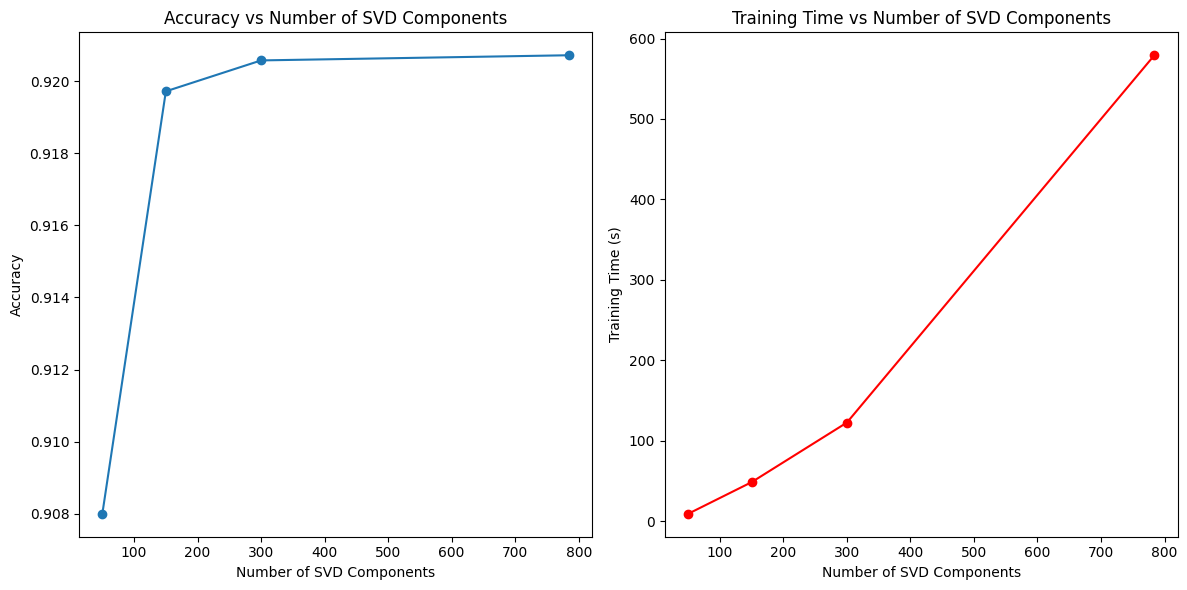

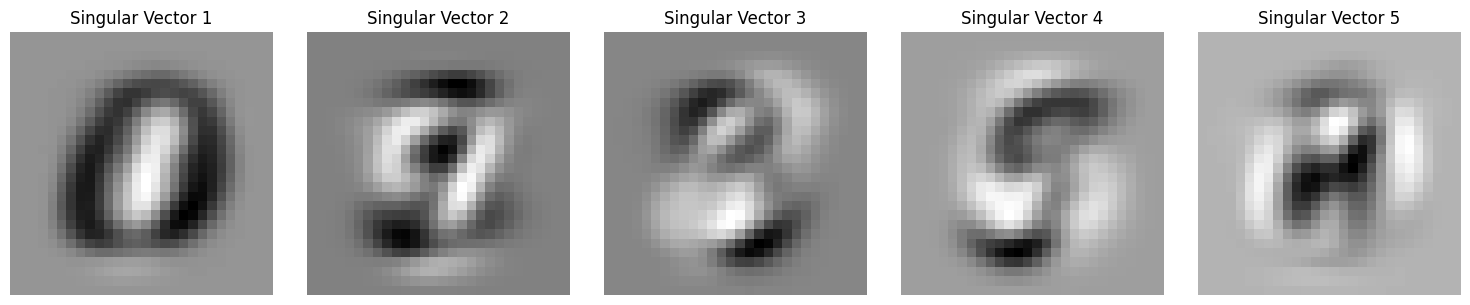

In [5]:
# Plot the results
components, accuracies, times = zip(*results)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title("Accuracy vs Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(components, times, marker='o', color='r')
plt.title("Training Time vs Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Training Time (s)")

plt.tight_layout()
plt.show()

# Visualize the top 5 singular vectors
top_5_singular_vectors = U_reduced[:, :5]

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(top_5_singular_vectors[:, i].reshape(28, 28), cmap='gray')
    plt.title(f"Singular Vector {i + 1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

There are two very different graphs here. Let us analyze the first one, Accuracy vs. Number of SVD components. There is a very sharp increase in accuracy from 50 components to 150, and rather stagnant growth beyond that. This asymptotic behavior suggests that accuracy levels out at around 300 SVD components. The next graph is Training Time vs number of svd components. Unsurprisingly, the more SVD components there are, the higher the training time in what appears to be an exponential relationship. Right around 300 SVD components, the training time explodes. Thus, I would pick 300 SVD components as a good sweet spot between having high accuracy but not having an aggressively high training time.